# mor

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2754
True     1943
Name: count, dtype: int64

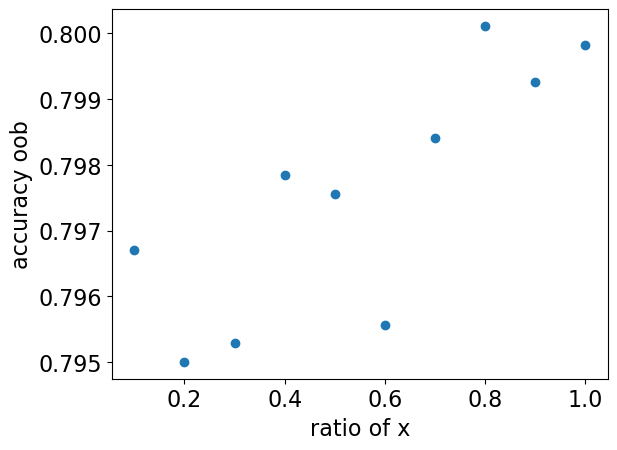

最適なx: 0.8


importance
Al / Si      0.114119
Na / Si      0.087710
F / Si       0.007281
H2O / Si     0.065560
sda1 / Si    0.070603
...               ...
JGT10        0.001000
SRW09        0.001005
SRW10        0.000746
TSRW10       0.001945
WPath        0.000626

[272 rows x 1 columns]

False  True
False   2042    23
True      30  1427

False  True
False    574   115
True     126   360

正解率(Accuracy) : 訓練 0.9849517319704714, 検証 0.7948936170212766
適合率(Precision) : 訓練 0.9841379310344828, 検証 0.7578947368421053
再現率(Recall) : 訓練 0.9794097460535347, 検証 0.7407407407407407
F1スコア : 訓練 0.9817681458548332, 検証 0.7492195629552549


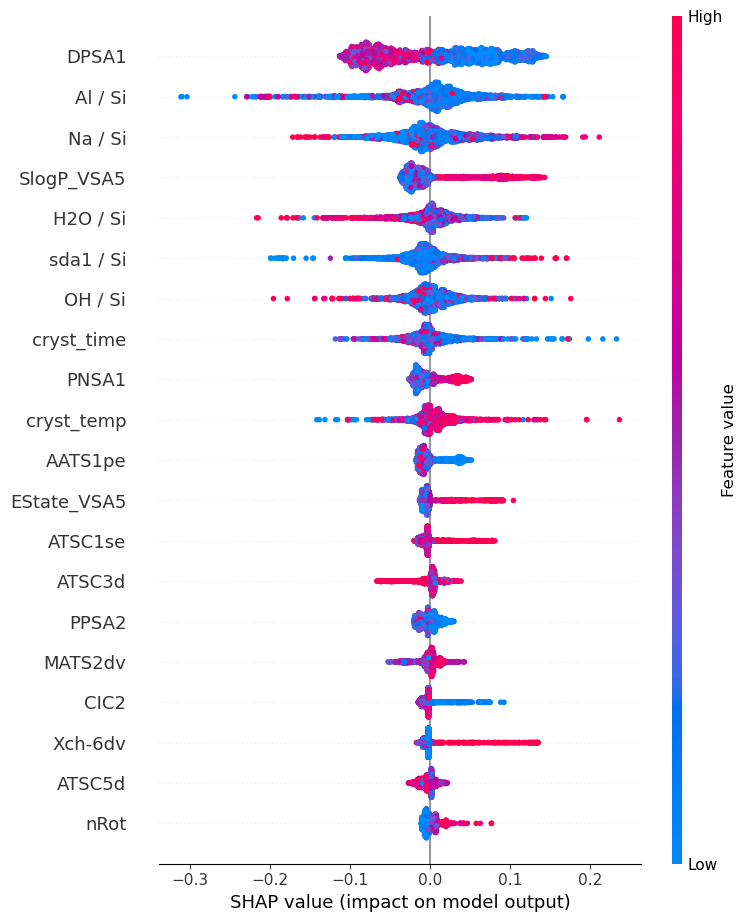

In [3]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 280].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# bea

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952     True
29977     True
29978     True
Name: bea, Length: 4697, dtype: object

bea
False    4232
True      465
Name: count, dtype: int64

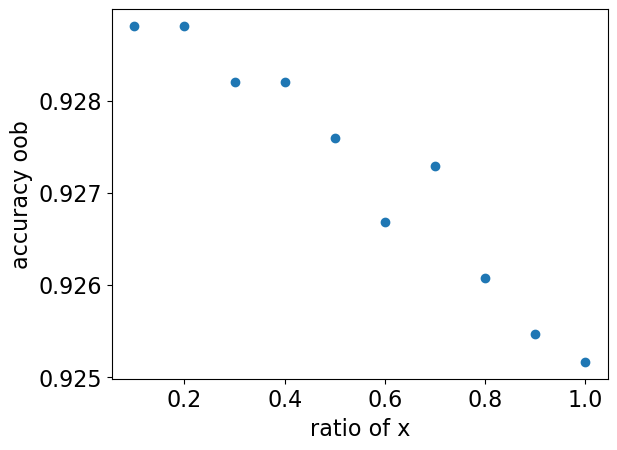

最適なx: 0.1


importance
Al / Si      0.098622
Na / Si      0.059992
F / Si       0.011975
H2O / Si     0.085076
sda1 / Si    0.069425
...               ...
JGT10        0.000998
SRW09        0.001338
SRW10        0.002248
TSRW10       0.001491
WPath        0.001039

[272 rows x 1 columns]

False  True
False   2957     5
True      11   314

False  True
False   1220    50
True      58    82

正解率(Accuracy) : 訓練 0.9951323395193186, 検証 0.9234042553191489
適合率(Precision) : 訓練 0.9843260188087775, 検証 0.6212121212121212
再現率(Recall) : 訓練 0.9661538461538461, 検証 0.5857142857142857
F1スコア : 訓練 0.9751552795031055, 検証 0.6029411764705882


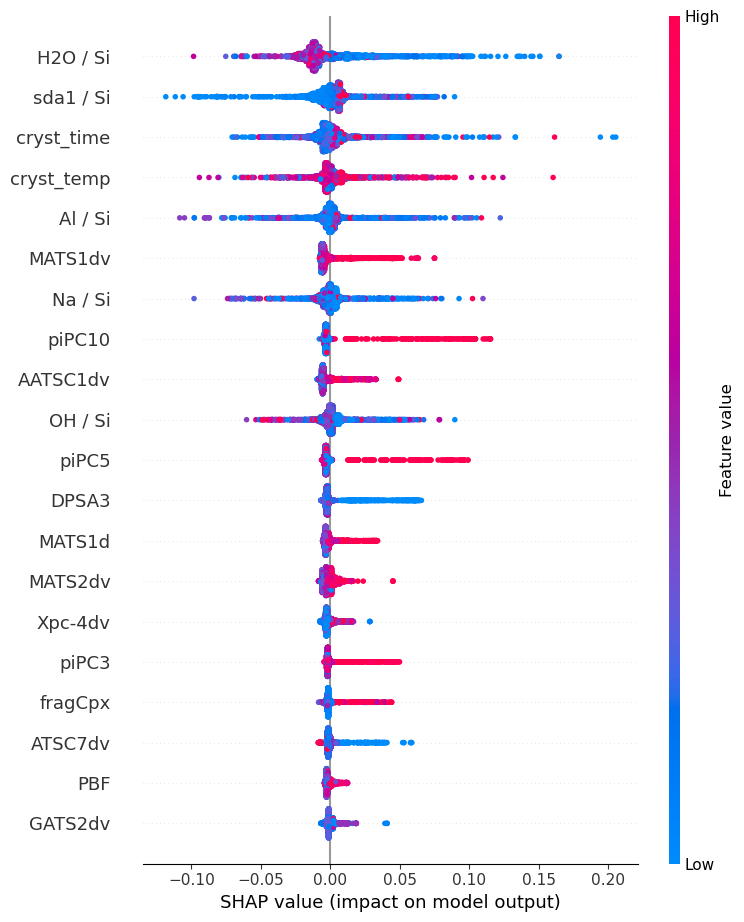

In [8]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 281].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtt

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: mtt, Length: 4697, dtype: object

mtt
False    4192
True      505
Name: count, dtype: int64

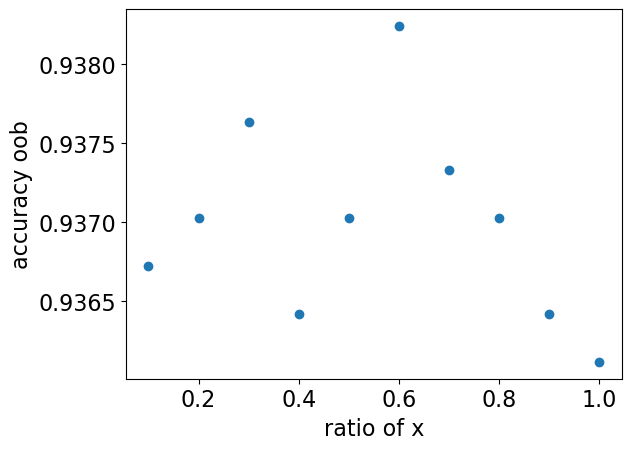

最適なx: 0.6


importance
Al / Si      0.096188
Na / Si      0.070292
F / Si       0.006817
H2O / Si     0.090191
sda1 / Si    0.069083
...               ...
JGT10        0.000803
SRW09        0.000577
SRW10        0.102283
TSRW10       0.000802
WPath        0.000525

[272 rows x 1 columns]

False  True
False   2929     5
True      15   338

False  True
False   1232    26
True      62    90

正解率(Accuracy) : 訓練 0.9939154243991482, 検証 0.9375886524822695
適合率(Precision) : 訓練 0.9854227405247813, 検証 0.7758620689655172
再現率(Recall) : 訓練 0.9575070821529745, 検証 0.5921052631578947
F1スコア : 訓練 0.9712643678160919, 検証 0.6716417910447762


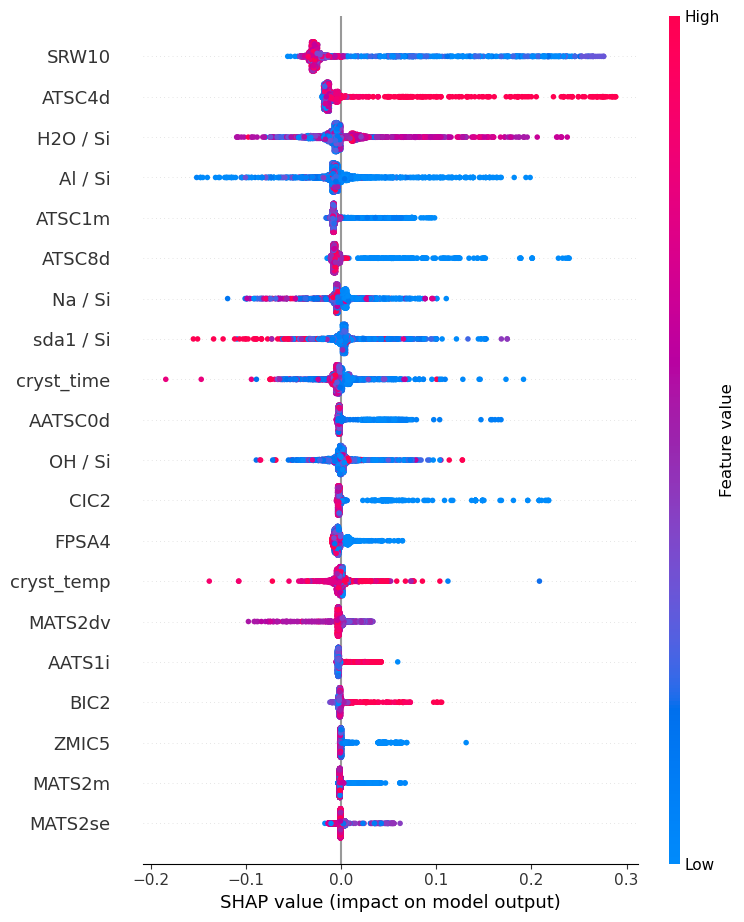

In [9]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 282].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# cas

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: cas, Length: 4697, dtype: object

cas
False    3357
True     1340
Name: count, dtype: int64

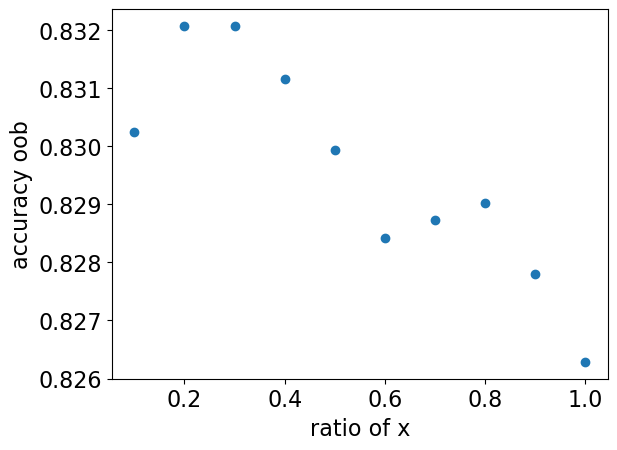

最適なx: 0.2


importance
Al / Si      0.131262
Na / Si      0.081956
F / Si       0.007997
H2O / Si     0.058803
sda1 / Si    0.063581
...               ...
JGT10        0.001279
SRW09        0.000520
SRW10        0.001171
TSRW10       0.001367
WPath        0.001203

[272 rows x 1 columns]

False  True
False   2328    21
True      19   919

False  True
False    909    99
True     144   258

正解率(Accuracy) : 訓練 0.9878308487982963, 検証 0.8276595744680851
適合率(Precision) : 訓練 0.9776595744680852, 検証 0.7226890756302521
再現率(Recall) : 訓練 0.9797441364605544, 検証 0.6417910447761194
F1スコア : 訓練 0.9787007454739084, 検証 0.6798418972332015


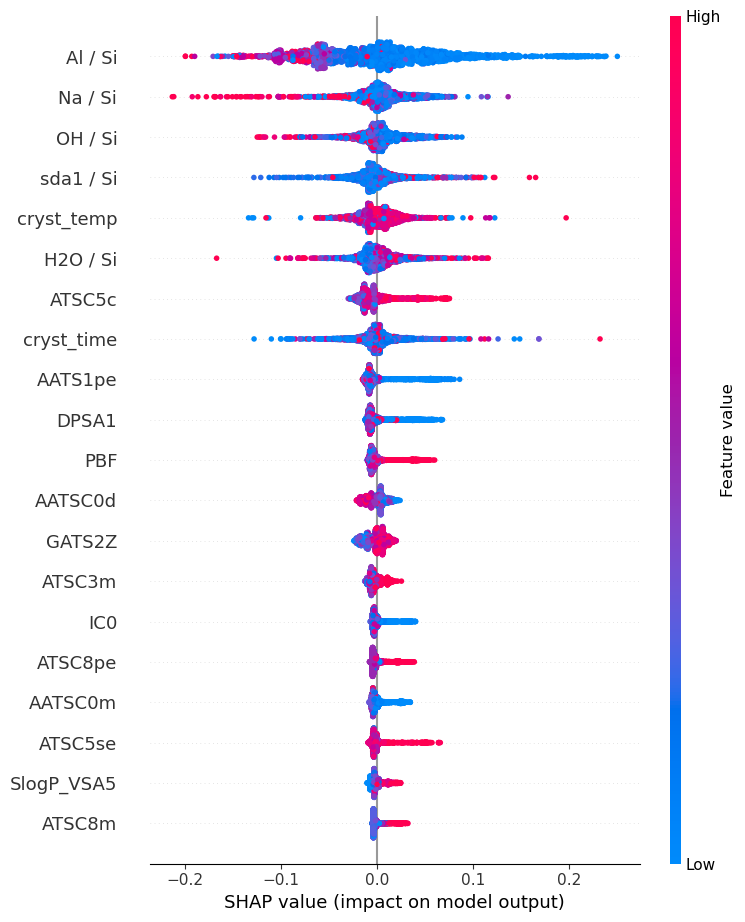

In [10]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 283].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d6r

249      False
250       True
251      False
252      False
253       True
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d6r, Length: 4697, dtype: object

d6r
False    3705
True      992
Name: count, dtype: int64

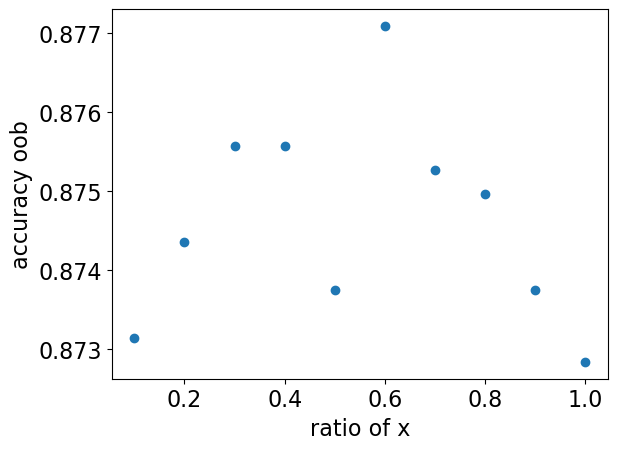

最適なx: 0.6


importance
Al / Si      0.096916
Na / Si      0.067613
F / Si       0.011165
H2O / Si     0.078106
sda1 / Si    0.081211
...               ...
JGT10        0.016499
SRW09        0.001006
SRW10        0.000658
TSRW10       0.001832
WPath        0.000891

[272 rows x 1 columns]

False  True
False   2582    11
True      30   664

False  True
False   1051    61
True     121   177

正解率(Accuracy) : 訓練 0.9875266200182538, 検証 0.8709219858156029
適合率(Precision) : 訓練 0.9837037037037037, 検証 0.7436974789915967
再現率(Recall) : 訓練 0.9567723342939481, 検証 0.5939597315436241
F1スコア : 訓練 0.9700511322132944, 検証 0.6604477611940298


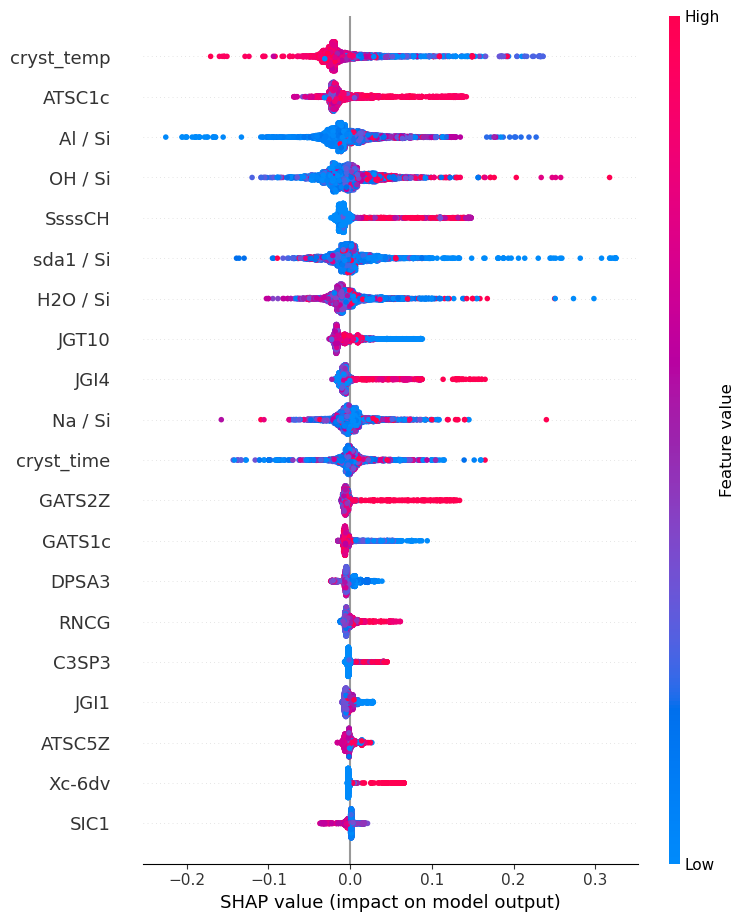

In [11]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 284].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# fer

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: fer, Length: 4697, dtype: object

fer
False    4455
True      242
Name: count, dtype: int64

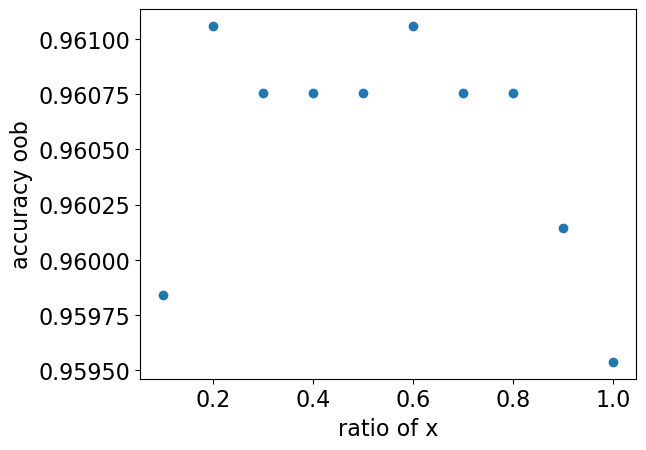

最適なx: 0.2


importance
Al / Si      0.120413
Na / Si      0.113855
F / Si       0.020762
H2O / Si     0.070460
sda1 / Si    0.081693
...               ...
JGT10        0.003397
SRW09        0.001709
SRW10        0.001242
TSRW10       0.001578
WPath        0.003449

[272 rows x 1 columns]

False  True
False   3115     3
True      10   159

False  True
False   1320    17
True      40    33

正解率(Accuracy) : 訓練 0.9960450258594463, 検証 0.9595744680851064
適合率(Precision) : 訓練 0.9814814814814815, 検証 0.66
再現率(Recall) : 訓練 0.9408284023668639, 検証 0.4520547945205479
F1スコア : 訓練 0.9607250755287009, 検証 0.5365853658536586


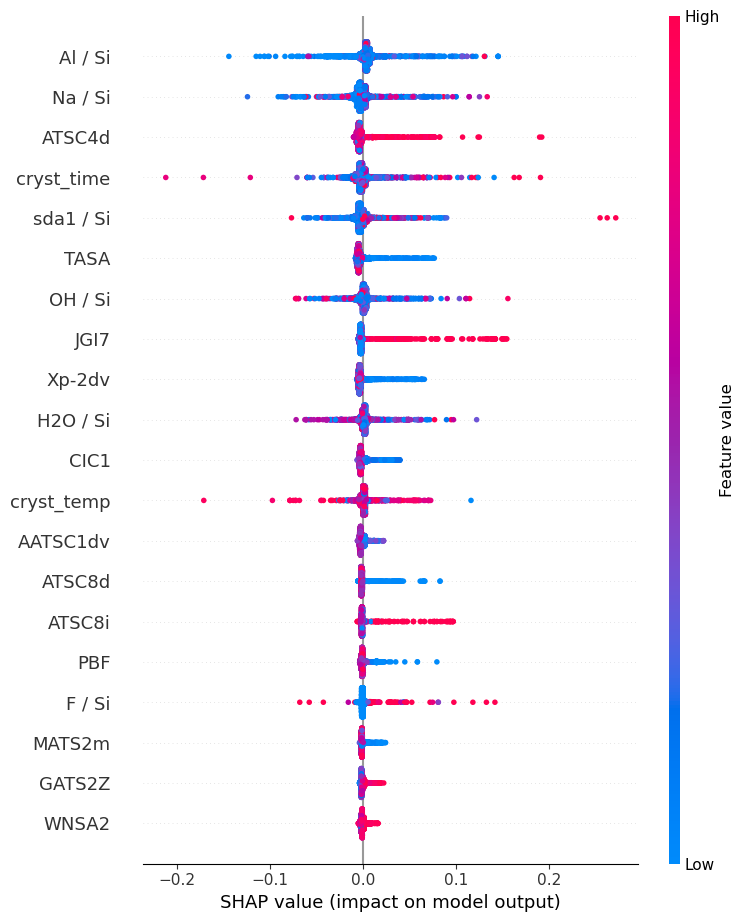

In [12]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 285].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mel

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: mel, Length: 4697, dtype: object

mel
False    3364
True     1333
Name: count, dtype: int64

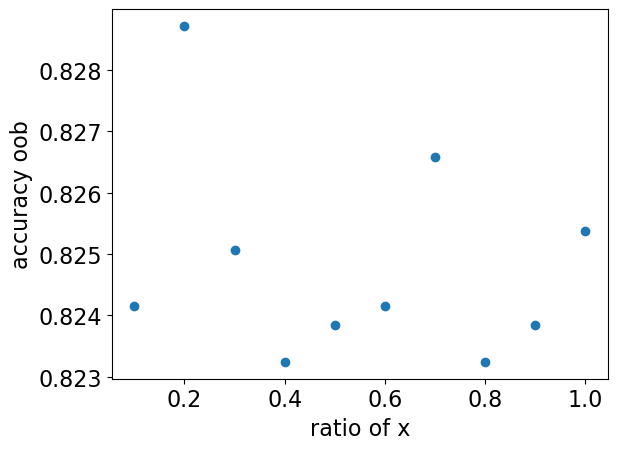

最適なx: 0.2


importance
Al / Si      0.109300
Na / Si      0.078761
F / Si       0.008887
H2O / Si     0.055314
sda1 / Si    0.067371
...               ...
JGT10        0.000955
SRW09        0.000524
SRW10        0.001660
TSRW10       0.001256
WPath        0.000683

[272 rows x 1 columns]

False  True
False   2322    32
True      18   915

False  True
False    903   107
True     137   263

正解率(Accuracy) : 訓練 0.9847885609978704, 検証 0.826950354609929
適合率(Precision) : 訓練 0.9662090813093981, 検証 0.7108108108108108
再現率(Recall) : 訓練 0.9807073954983923, 検証 0.6575
F1スコア : 訓練 0.973404255319149, 検証 0.6831168831168831


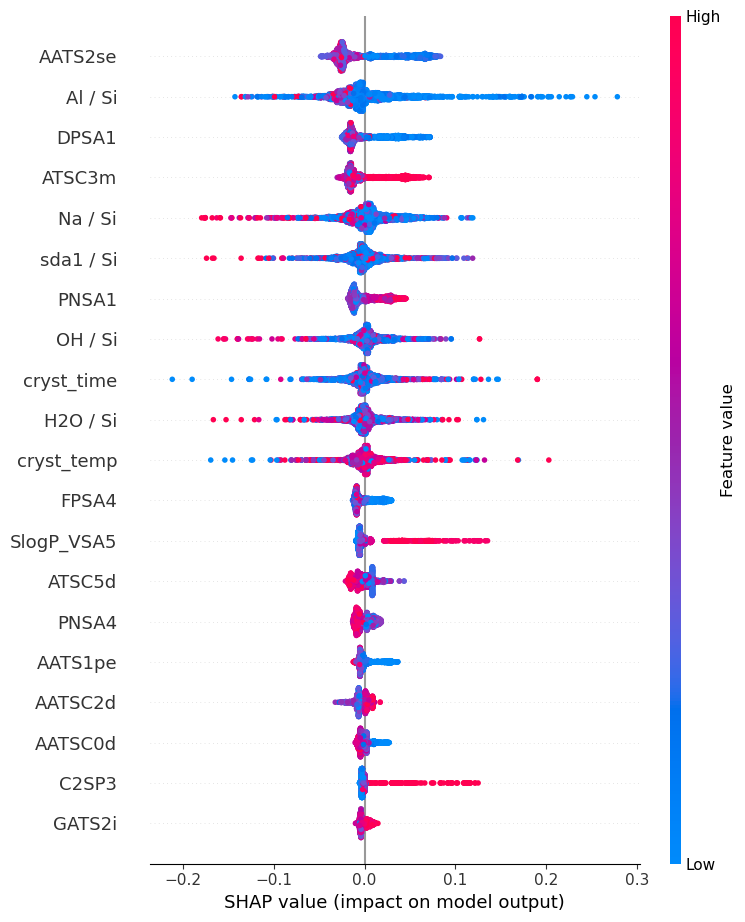

In [13]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 286].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mfi

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: mfi, Length: 4697, dtype: object

mfi
False    3502
True     1195
Name: count, dtype: int64

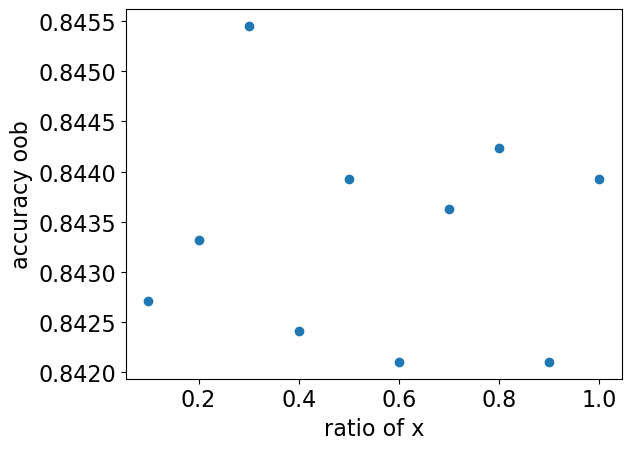

最適なx: 0.30000000000000004


importance
Al / Si      0.111604
Na / Si      0.073046
F / Si       0.009985
H2O / Si     0.051049
sda1 / Si    0.069357
...               ...
JGT10        0.001004
SRW09        0.000212
SRW10        0.001035
TSRW10       0.000706
WPath        0.000537

[272 rows x 1 columns]

False  True
False   2431    20
True      20   816

False  True
False    927   124
True     121   238

正解率(Accuracy) : 訓練 0.9878308487982963, 検証 0.8262411347517731
適合率(Precision) : 訓練 0.9760765550239234, 検証 0.6574585635359116
再現率(Recall) : 訓練 0.9760765550239234, 検証 0.6629526462395543
F1スコア : 訓練 0.9760765550239234, 検証 0.6601941747572816


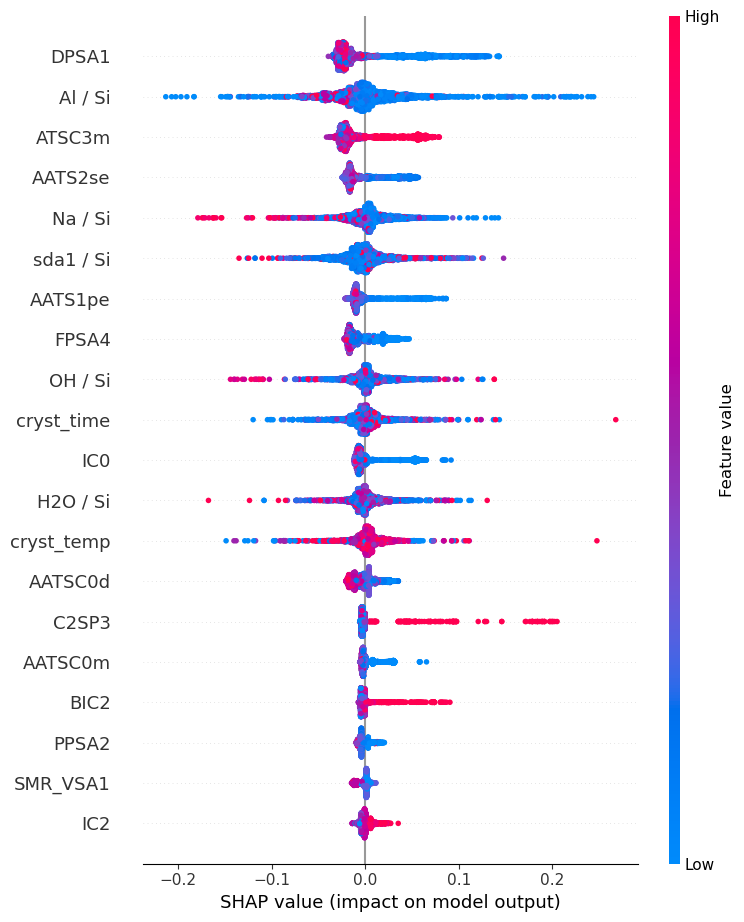

In [14]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 287].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtw

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952     True
29977     True
29978     True
Name: mtw, Length: 4697, dtype: object

mtw
False    4050
True      647
Name: count, dtype: int64

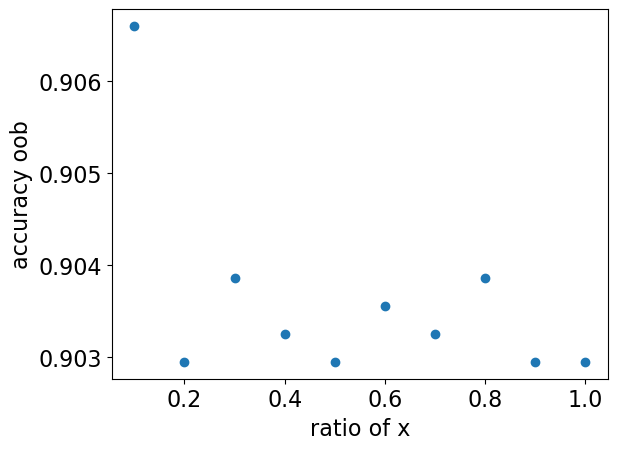

最適なx: 0.1


importance
Al / Si      0.092622
Na / Si      0.071266
F / Si       0.011178
H2O / Si     0.063592
sda1 / Si    0.065965
...               ...
JGT10        0.001558
SRW09        0.004287
SRW10        0.001481
TSRW10       0.006188
WPath        0.001131

[272 rows x 1 columns]

False  True
False   2827     7
True      14   439

False  True
False   1149    67
True      78   116

正解率(Accuracy) : 訓練 0.9936111956191056, 検証 0.8971631205673759
適合率(Precision) : 訓練 0.984304932735426, 検証 0.6338797814207651
再現率(Recall) : 訓練 0.9690949227373068, 検証 0.5979381443298969
F1スコア : 訓練 0.9766407119021134, 検証 0.6153846153846154


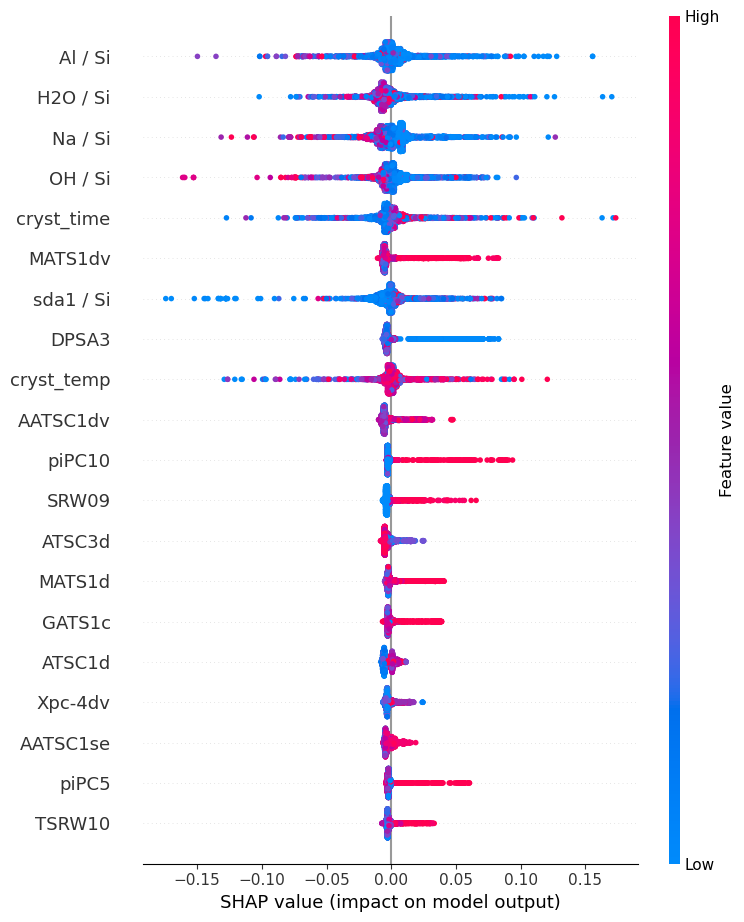

In [15]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 288].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# ton

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: ton, Length: 4697, dtype: object

ton
False    4306
True      391
Name: count, dtype: int64

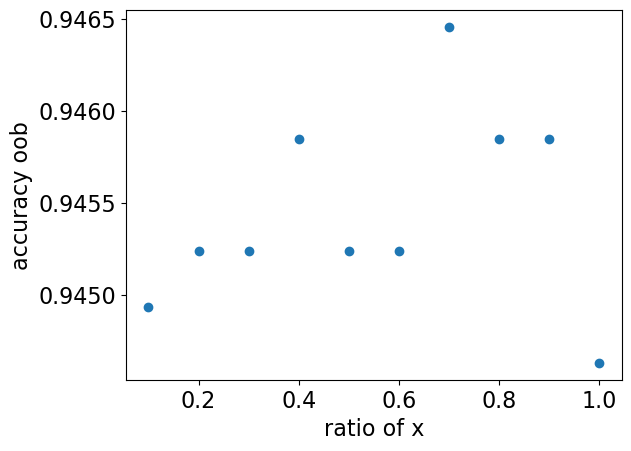

最適なx: 0.7000000000000001


importance
Al / Si      0.095327
Na / Si      0.077474
F / Si       0.006413
H2O / Si     0.095706
sda1 / Si    0.054264
...               ...
JGT10        0.001046
SRW09        0.000869
SRW10        0.107706
TSRW10       0.001375
WPath        0.000465

[272 rows x 1 columns]

False  True
False   3011     2
True      15   259

False  True
False   1262    31
True      41    76

正解率(Accuracy) : 訓練 0.9948281107392759, 検証 0.948936170212766
適合率(Precision) : 訓練 0.9923371647509579, 検証 0.7102803738317757
再現率(Recall) : 訓練 0.9452554744525548, 検証 0.6495726495726496
F1スコア : 訓練 0.9682242990654205, 検証 0.6785714285714286


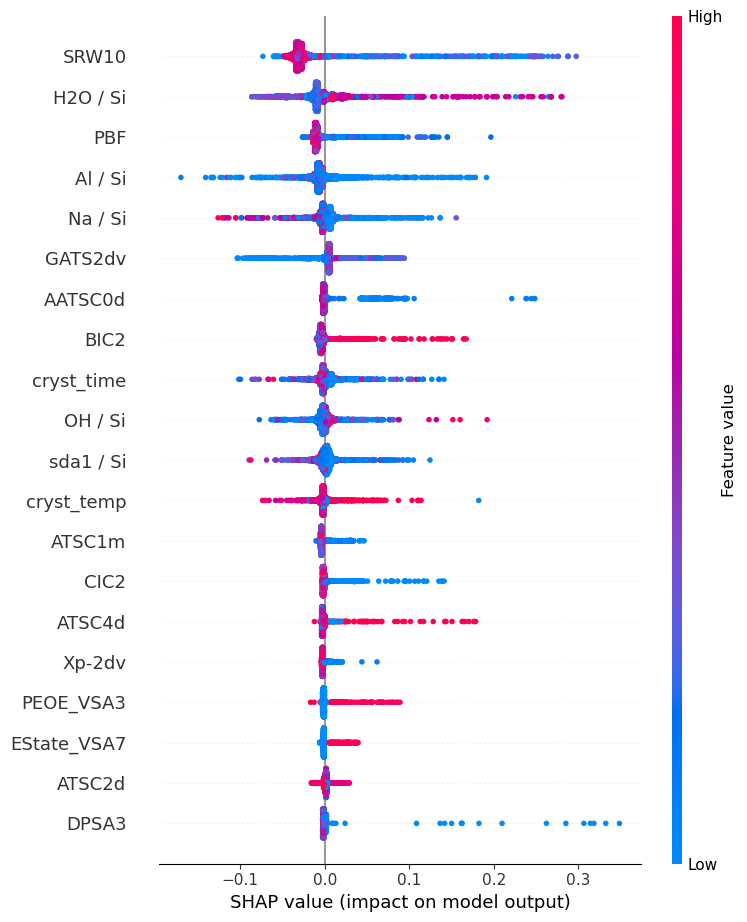

In [16]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 289].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# non

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: non, Length: 4697, dtype: object

non
False    4579
True      118
Name: count, dtype: int64

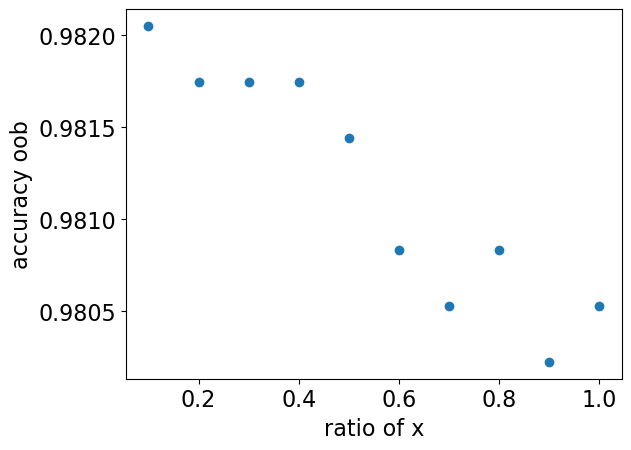

最適なx: 0.1


importance
Al / Si      0.103031
Na / Si      0.073706
F / Si       0.023648
H2O / Si     0.055518
sda1 / Si    0.040406
...               ...
JGT10        0.001719
SRW09        0.007112
SRW10        0.001273
TSRW10       0.001184
WPath        0.011057

[272 rows x 1 columns]

False  True
False   3203     1
True       1    82

False  True
False   1362    13
True      14    21

正解率(Accuracy) : 訓練 0.9993915424399148, 検証 0.9808510638297873
適合率(Precision) : 訓練 0.9879518072289156, 検証 0.6176470588235294
再現率(Recall) : 訓練 0.9879518072289156, 検証 0.6
F1スコア : 訓練 0.9879518072289156, 検証 0.6086956521739131


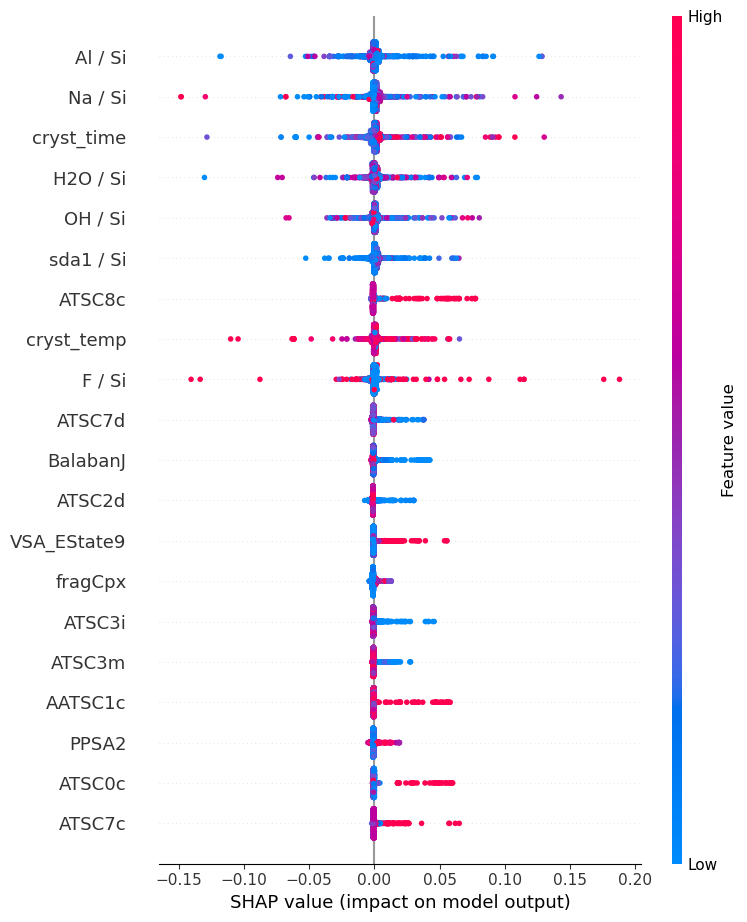

In [1]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 290].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d8r

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d8r, Length: 4697, dtype: object

d8r
False    4671
True       26
Name: count, dtype: int64

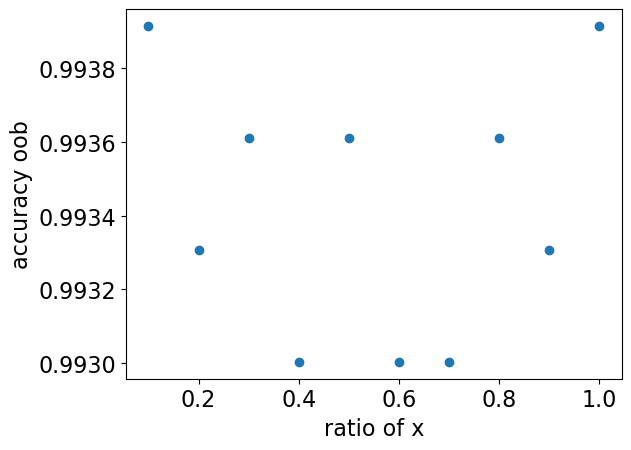

最適なx: 0.1


importance
Al / Si      0.068854
Na / Si      0.090404
F / Si       0.041643
H2O / Si     0.128729
sda1 / Si    0.129756
...               ...
JGT10        0.000750
SRW09        0.000157
SRW10        0.000306
TSRW10       0.000477
WPath        0.000318

[272 rows x 1 columns]

False  True
False   3269     0
True       3    15

False  True
False   1398     4
True       7     1

正解率(Accuracy) : 訓練 0.9990873136598722, 検証 0.9921985815602837
適合率(Precision) : 訓練 1.0, 検証 0.2
再現率(Recall) : 訓練 0.8333333333333334, 検証 0.125
F1スコア : 訓練 0.9090909090909091, 検証 0.15384615384615385


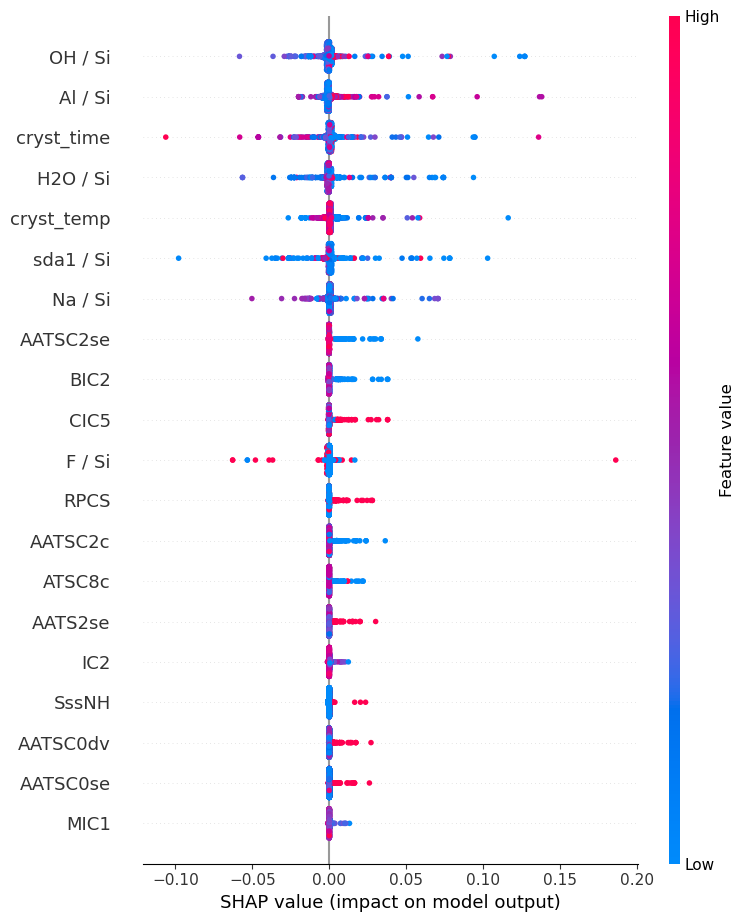

In [2]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 291].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# can

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: can, Length: 4697, dtype: object

can
False    4543
True      154
Name: count, dtype: int64

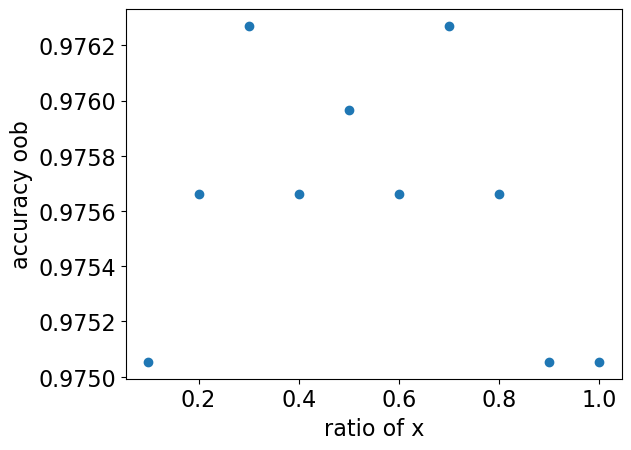

最適なx: 0.30000000000000004


importance
Al / Si      0.083550
Na / Si      0.126166
F / Si       0.003142
H2O / Si     0.081212
sda1 / Si    0.144657
...               ...
JGT10        0.000875
SRW09        0.000603
SRW10        0.000989
TSRW10       0.000883
WPath        0.001194

[272 rows x 1 columns]

False  True
False   3177     2
True      14    94

False  True
False   1350    14
True      17    29

正解率(Accuracy) : 訓練 0.9951323395193186, 検証 0.9780141843971631
適合率(Precision) : 訓練 0.9791666666666666, 検証 0.6744186046511628
再現率(Recall) : 訓練 0.8703703703703703, 検証 0.6304347826086957
F1スコア : 訓練 0.9215686274509803, 検証 0.651685393258427


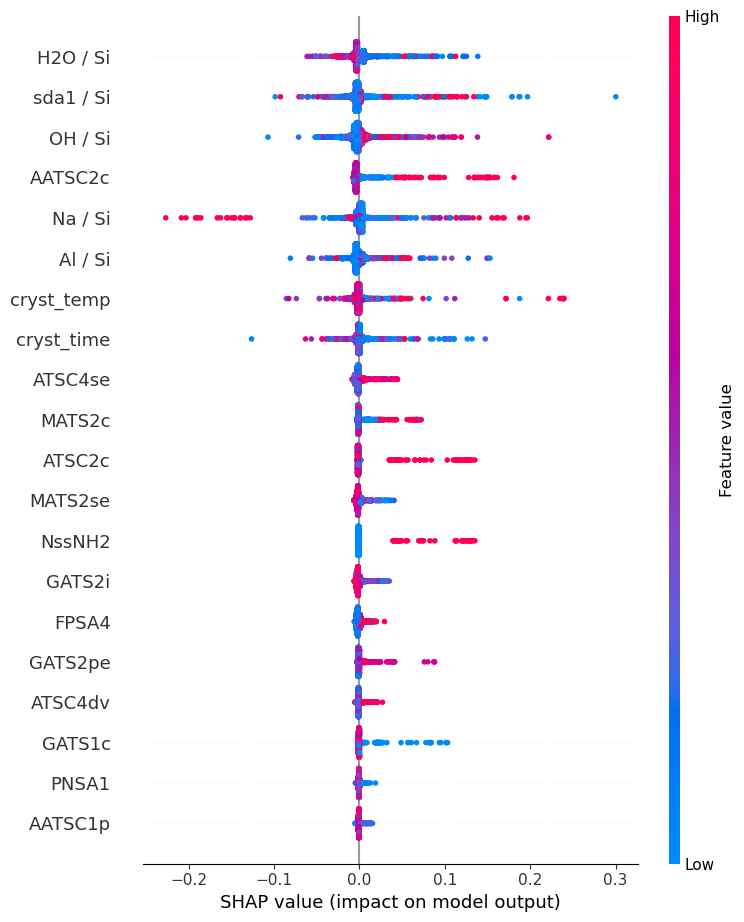

In [3]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 292].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# phi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: phi, Length: 4697, dtype: object

phi
False    4581
True      116
Name: count, dtype: int64

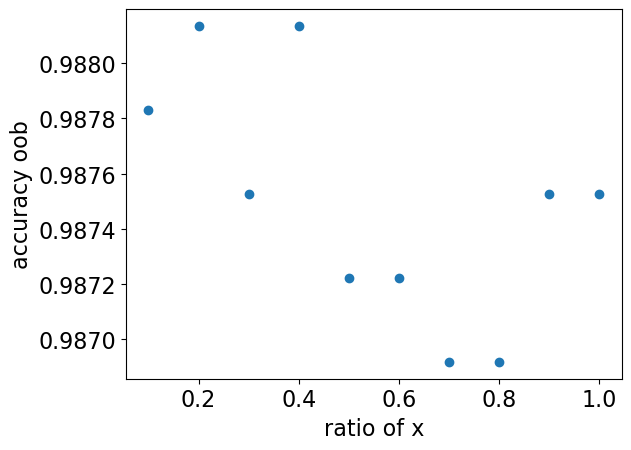

最適なx: 0.2


importance
Al / Si      0.071935
Na / Si      0.127790
F / Si       0.041580
H2O / Si     0.047082
sda1 / Si    0.072118
...               ...
JGT10        0.001962
SRW09        0.000044
SRW10        0.000336
TSRW10       0.000584
WPath        0.001010

[272 rows x 1 columns]

False  True
False   3203     3
True       4    77

False  True
False   1366     9
True      11    24

正解率(Accuracy) : 訓練 0.9978703985397018, 検証 0.9858156028368794
適合率(Precision) : 訓練 0.9625, 検証 0.7272727272727273
再現率(Recall) : 訓練 0.9506172839506173, 検証 0.6857142857142857
F1スコア : 訓練 0.9565217391304348, 検証 0.7058823529411765


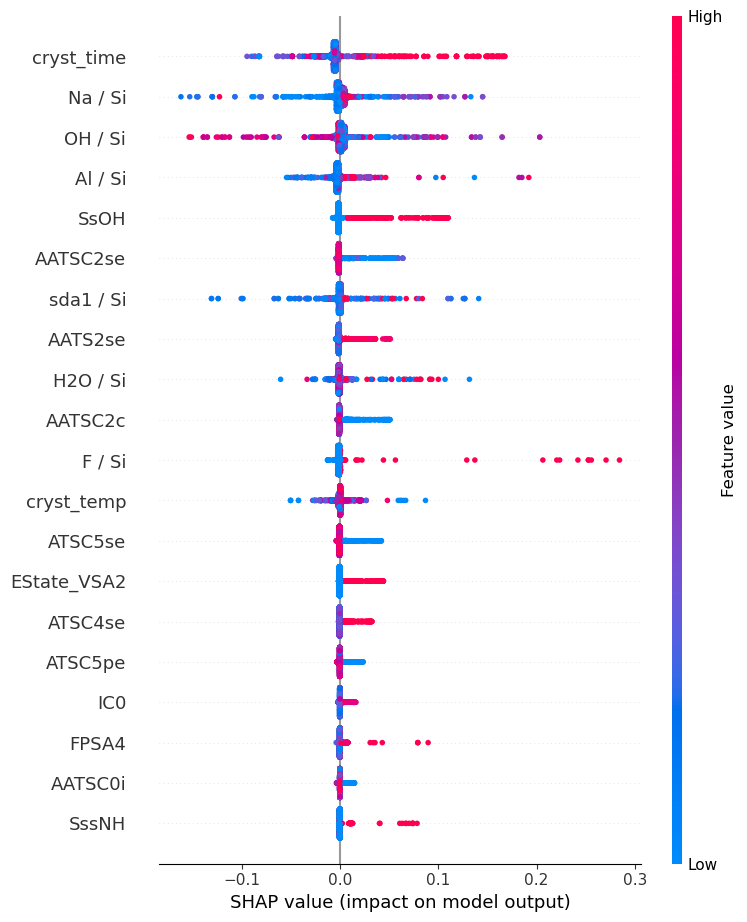

In [4]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 293].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# sod

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: sod, Length: 4697, dtype: object

sod
False    4395
True      302
Name: count, dtype: int64

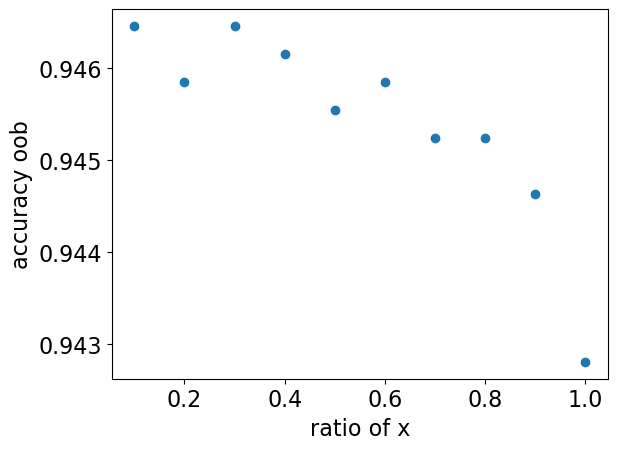

最適なx: 0.1


importance
Al / Si      0.111212
Na / Si      0.110082
F / Si       0.009361
H2O / Si     0.092357
sda1 / Si    0.102462
...               ...
JGT10        0.000749
SRW09        0.000622
SRW10        0.000848
TSRW10       0.001175
WPath        0.000644

[272 rows x 1 columns]

ValueError: pos_label=mor is not a valid label. It should be one of ['False', 'True']

In [5]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 294].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# gme

249      False
250       True
251      False
252      False
253       True
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: gme, Length: 4697, dtype: object

gme
False    4529
True      168
Name: count, dtype: int64

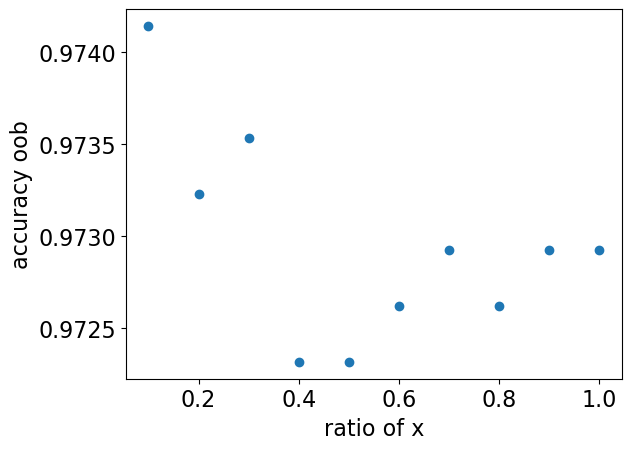

最適なx: 0.1


importance
Al / Si      0.106521
Na / Si      0.135709
F / Si       0.000937
H2O / Si     0.097872
sda1 / Si    0.103950
...               ...
JGT10        0.009228
SRW09        0.000068
SRW10        0.000836
TSRW10       0.001369
WPath        0.000942

[272 rows x 1 columns]

False  True
False   3168     1
True      14   104

False  True
False   1348    12
True      23    27

正解率(Accuracy) : 訓練 0.9954365682993611, 検証 0.975177304964539
適合率(Precision) : 訓練 0.9904761904761905, 検証 0.6923076923076923
再現率(Recall) : 訓練 0.8813559322033898, 検証 0.54
F1スコア : 訓練 0.9327354260089686, 検証 0.6067415730337079


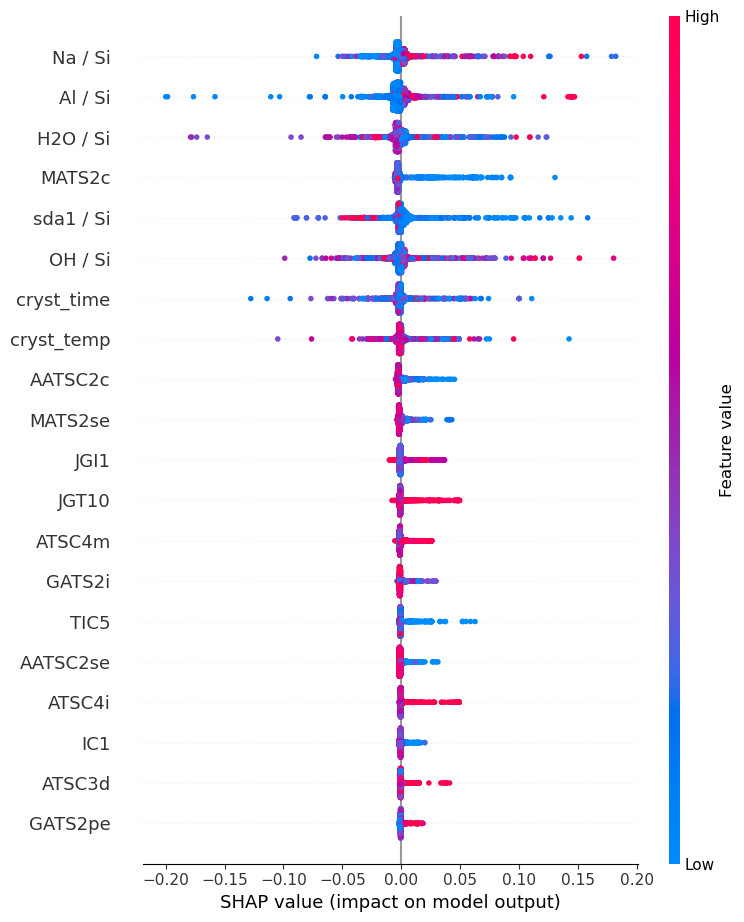

In [6]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 295].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# pau

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: pau, Length: 4697, dtype: object

pau
False    4671
True       26
Name: count, dtype: int64

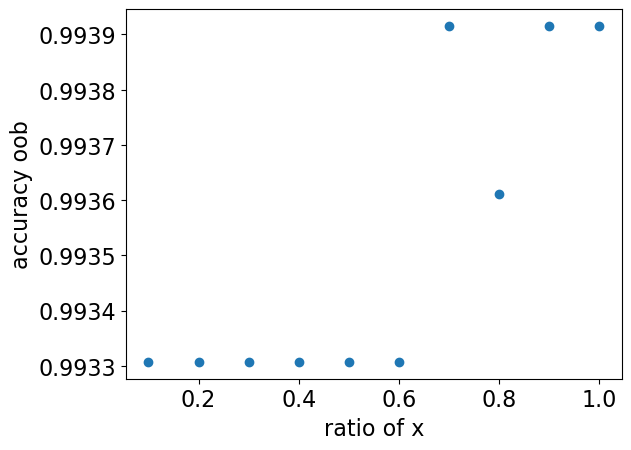

最適なx: 0.7000000000000001


importance
Al / Si      0.112493
Na / Si      0.038021
F / Si       0.018673
H2O / Si     0.097695
sda1 / Si    0.170320
...               ...
JGT10        0.001161
SRW09        0.000000
SRW10        0.000955
TSRW10       0.000490
WPath        0.000396

[272 rows x 1 columns]

False  True
False   3267     2
True       2    16

False  True
False   1397     5
True       4     4

正解率(Accuracy) : 訓練 0.9987830848798296, 検証 0.9936170212765958
適合率(Precision) : 訓練 0.8888888888888888, 検証 0.4444444444444444
再現率(Recall) : 訓練 0.8888888888888888, 検証 0.5
F1スコア : 訓練 0.8888888888888888, 検証 0.47058823529411764


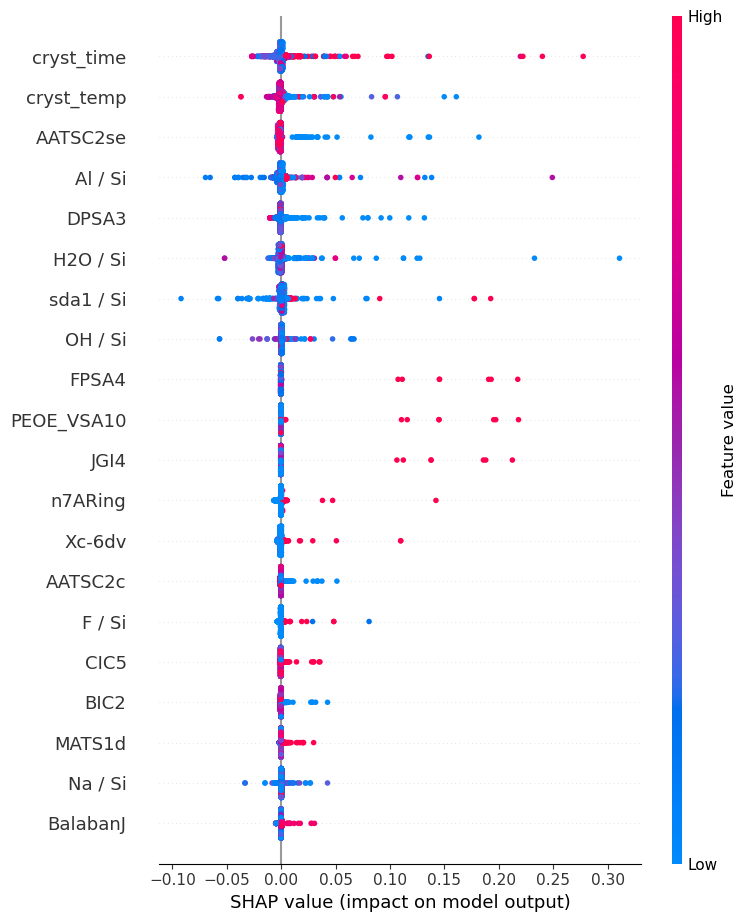

In [7]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 296].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# lta

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: lta, Length: 4697, dtype: object

lta
False    4577
True      120
Name: count, dtype: int64

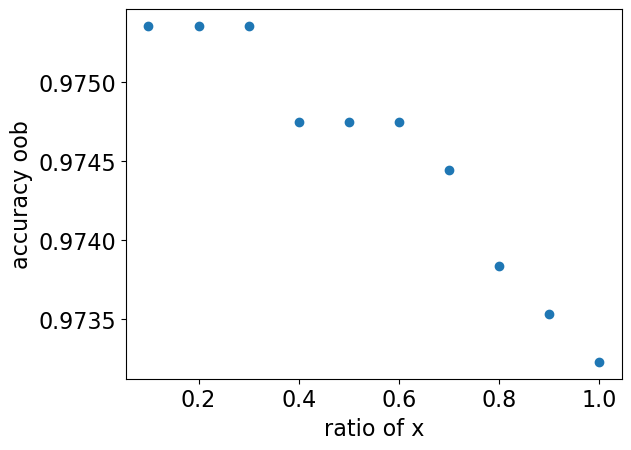

最適なx: 0.1


importance
Al / Si      0.108131
Na / Si      0.097913
F / Si       0.019554
H2O / Si     0.105137
sda1 / Si    0.134398
...               ...
JGT10        0.002372
SRW09        0.000261
SRW10        0.000912
TSRW10       0.000765
WPath        0.000752

[272 rows x 1 columns]

False  True
False   3198     5
True       3    81

False  True
False   1366     8
True      22    14

正解率(Accuracy) : 訓練 0.9975661697596593, 検証 0.9787234042553191
適合率(Precision) : 訓練 0.9418604651162791, 検証 0.6363636363636364
再現率(Recall) : 訓練 0.9642857142857143, 検証 0.3888888888888889
F1スコア : 訓練 0.9529411764705882, 検証 0.4827586206896552


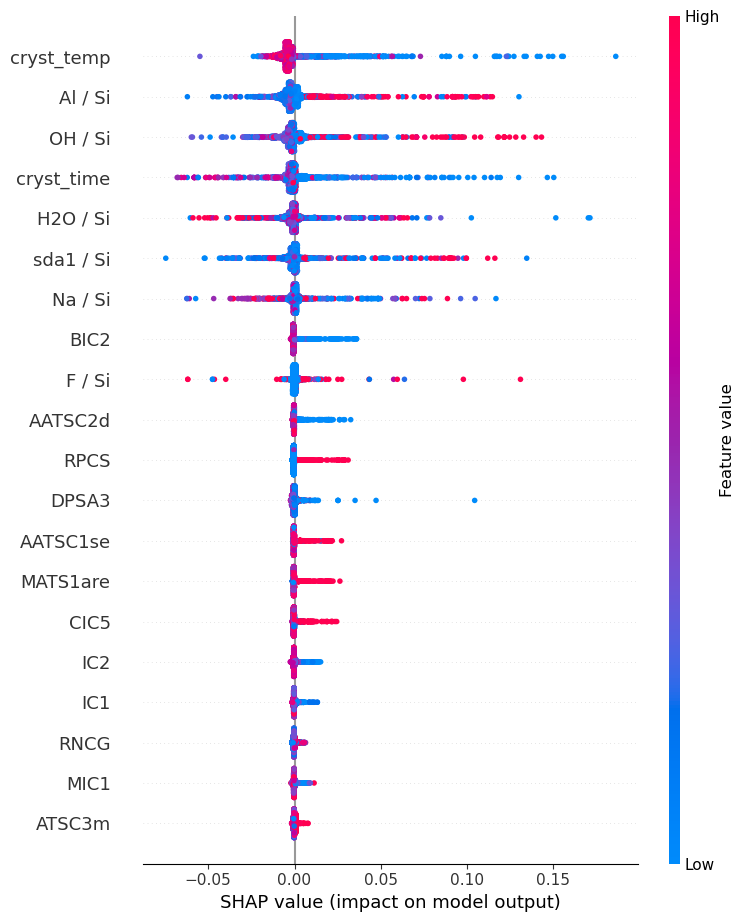

In [8]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 297].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# jbw

C:\Users\yamamoto02\AppData\Local\Temp\ipykernel_17336\563501724.py:2: DtypeWarning: Columns (281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('dataset_mordred_CBU_jbw.csv', index_col=0, header=0)


249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: jbw, Length: 4697, dtype: object

jbw
False    4148
True      549
Name: count, dtype: int64

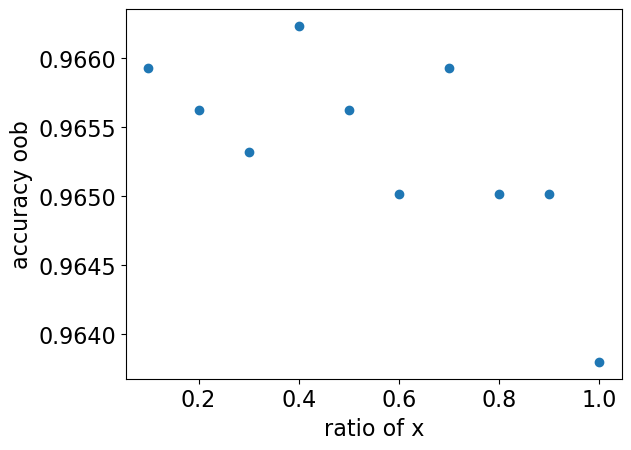

最適なx: 0.4


importance
Al / Si      0.113217
Na / Si      0.063375
F / Si       0.002920
H2O / Si     0.059889
sda1 / Si    0.043270
...               ...
JGT10        0.001651
SRW09        0.002300
SRW10        0.040621
TSRW10       0.000915
WPath        0.000818

[272 rows x 1 columns]

False  True
False   2903     0
True       4   380

False  True
False   1222    23
True      30   135

正解率(Accuracy) : 訓練 0.9987830848798296, 検証 0.9624113475177305
適合率(Precision) : 訓練 1.0, 検証 0.8544303797468354
再現率(Recall) : 訓練 0.9895833333333334, 検証 0.8181818181818182
F1スコア : 訓練 0.9947643979057592, 検証 0.8359133126934984


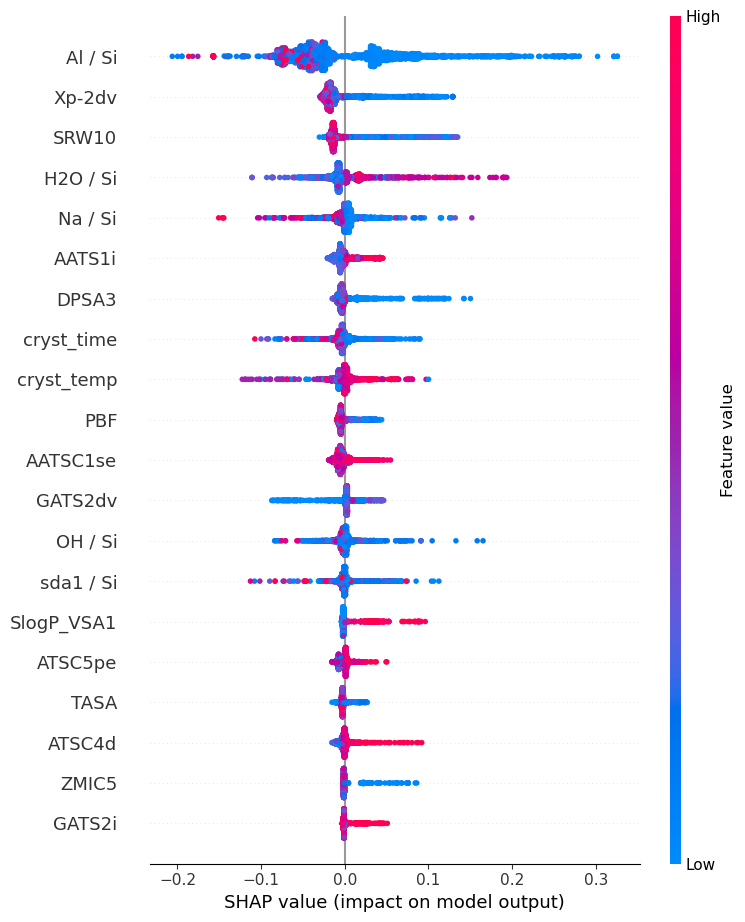

In [9]:
import pandas as pd
dataset=pd.read_csv('dataset_mordred_CBU_jbw.csv', index_col=0, header=0)
x=dataset.iloc[:, :272]
y=dataset.iloc[:, 298].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)